# Performing a gridsearch on  $h$, $\alpha$, $\beta$

## Utils

In [8]:
# import numpy as np
# from matplotlib import pyplot as plt
# import copy

# # Helper functions



# def f_global(x, fs_private):    # global objective function
#     """    
#     Returns
#     -------
#     output: float
#         The output of our global objective function for the current state of the agents.
#             The goal is to make this output as low as possible (see eq. 1).
    
#     """


#     private_outputs = [ f_i(x_i) for f_i, x_i in zip(fs_private, x) ]

#     # print("Private Outputs:",  private_outputs)

#     global_output = sum(private_outputs)

#     return global_output



# def get_subgradient(f, x, h= 1e-2):

#     """
#     Parameters
#     -----------
#     f: function
#         An arbitrary function.
#     x: array-like
#         An array with the (multi-dimensional) point for which the subgradient of f is desired.
#     h: float
#         An infinitesimally small step along an axis.
    
#     Returns
#     -------

#     numpy array: shape (len(x), 1)
#          Gradient vector of f at point x.
#             Contains the partial derivatives of f with respect to x_1, ..., x_n.    
#     """

#     # if type(x[0]) is not float:
#     #     x = [float(x_i) for x_i in x]


#     Df = np.zeros((len(x), 1), dtype=int)    # array with the partial deriatives of f w.r.t. x_1, ..., x_n

#     for i in range(len(x)):

#         x_aux = np.copy(x)
        
#         x_aux[i] = x[i] + h

#         Df[i] = (f(x_aux)-f(x)) / h          
    
#     return Df




# def step(x, z, fs_private, beta= 0.2, alpha= 3, a= 1, h= 1e-2):
#     """
#     Changes the states of our agents based on a step in the optimization process.

#     Parameters
#     ----------
#     h: float > 0
#         h used in the Euler method of get_subgradient()
    
#     Returns
#     --------
#     x, z: tupple
#         The updated angents's states (x) and updawted auxiliary states (z). 

#     """

#     n_agents = len(fs_private)

#     #------------- first stage -----------------------
    
#     # nodes exchanges states x_i and compute auxiliary states z_i.

#     for i in range(n_agents):
        
#         z[i] = z[i] + beta*sum( [ a*(x[i] - x[j]) for j in range(n_agents) if j!= i ]  )

    
#     #------------- second stage --------------------  
    
#     # nodes exchange auxiliary states z_i and update states x_i.
    

#     for i in range(len(fs_private)):

#         print(x[i])
        
#         x[i] = x[i] + beta * sum( [ a*(x[j] - x[i]) for j in range(n_agents) if j!= i ] ) \
#                     + beta * sum( [ a*(z[j] - z[i]) for j in range(n_agents) if j!= i ] ) \
#                     - beta * alpha * get_subgradient(fs_private[i], x[i], h= h)
        
#     return x, z






# def plot_streamlined(alphas, betas, hs, n_iterations= 100):

#     """
#     Parameters:
#     -----------

#     Lists with the hyperparameters of the baseline algorithm (CT approach for DO)

#     """

    
#     N_AGENTS = 4          # the number of agents

#     P = np.array(
#         [ [[0.2, 0.1],
#            [0.1, 0.2]],

#           [[0.4, 0.1],
#            [0.2, 0.4]],
 
#           [[0.3, 0.1],
#            [0.1, 0.2]],
 
#           [[0.5, 0.1],
#            [0.1, 0.2]],   
#              ]
#     )

#     b = np.array(
#         [ [[1],
#            [8]],

#           [[1],
#            [1]],
  
#           [[3],
#            [1]],
  
#           [[5],
#            [1]],   
#            ]
#     )
    
#     c = np.linspace(start= 0, stop= 1, num= N_AGENTS)      # c_i are chosen uniformly from [0, 1]

#     for alpha in alphas:
#       for beta in betas:
#         for h in hs:

#             x1 = np.array(         # picking arbitrary initial parameters for the agents's states (2 parameters for a quadratic function) 
#                         [ [0.],
#                           [0.] ]
#                         )

#             x2 = np.array(        
#                         [ [0.],
#                           [0.] ]
#                         )

#             x3 = np.array(        
#                         [ [0.],
#                           [0.] ]
#                         )

#             x4 = np.array(        
#                         [ [0.],
#                           [0.] ]
#                         )


#             z1 = np.array(         # z (memory) MUST start at 0
#                         [ [0.],
#                           [0.] ]
#                         )

#             z2 = np.array(        
#                         [ [0.],
#                           [0.] ]
#                         )

#             z3 = np.array(        
#                         [ [0.],
#                           [0.] ]
#                         )

#             z4 = np.array(        
#                         [ [0.],
#                           [0.] ]
#                         )



#             # defining private objective functions

#             f1 = lambda x: np.squeeze(x.T @ P[0] @ x + b[0].T @ x + c[0])
#             f2 = lambda x: np.squeeze(x.T @ P[1] @ x + b[1].T @ x + c[1])
#             f3 = lambda x: np.squeeze(x.T @ P[2] @ x + b[2].T @ x + c[2])
#             f4 = lambda x: np.squeeze(x.T @ P[3] @ x + b[3].T @ x + c[3])

#             x = [x1, x2, x3, x4]
#             z = [z1, z2, z3, z4]
#             fs_private = [f1, f2, f3, f4]

#             history_f_global = []
#             history_agent1_parameter1 = []
#             history_agent1_parameter2 = []

#             history_agent1_memory1 = []
#             history_agent1_memory2 = []

#             for _ in range(n_iterations):

#                 history_f_global.append(f_global(x, fs_private))
#                 history_agent1_parameter1.append(x[0][0])
#                 history_agent1_parameter2.append(x[0][1])
#                 history_agent1_memory1.append(z[0][0])
#                 history_agent1_memory2.append(z[0][1])

#                 x, z = step(x, z, fs_private, alpha= alpha, beta= beta, h= h)
                
#             plt.plot(range(len(history_f_global)), history_f_global, label= f"alpha={alpha}, beta={beta}, h={h}")
#             plt.title(f"Output Global Ojective")
#     plt.legend()
#     plt.show()




#     for alpha in alphas:
#       for beta in betas:
#         for h in hs:

#             plt.axhline(y= -2.3333, linestyle='dashed', label= "optimal $x_1$")
#             plt.axhline(y= -4.3333, linestyle='dashed', label= "optimal $x_2$")

#             plt.plot(range(len(history_agent1_parameter1)), history_agent1_parameter1, label= f"$x_1$ - alpha={alpha}, beta={beta}, h={h}" )
#             plt.plot(range(len(history_agent1_parameter2)), history_agent1_parameter2, label= f"$x_2$ - alpha={alpha}, beta={beta}, h={h}" )



#     plt.title("Parameter Updates (agent 1)")
#     plt.legend()
#     plt.show()




#             # plt.title("Memory updates")
#             # plt.plot(range(len(history_agent1_memory1)), history_agent1_memory1, label= "$z_1^1$", color= "blue"  )
#             # plt.plot(range(len(history_agent1_memory2)), history_agent1_memory2, label= "$z_1^2$", color= "orange" )
#             # plt.legend()
#             # plt.show()




## Gridsearch

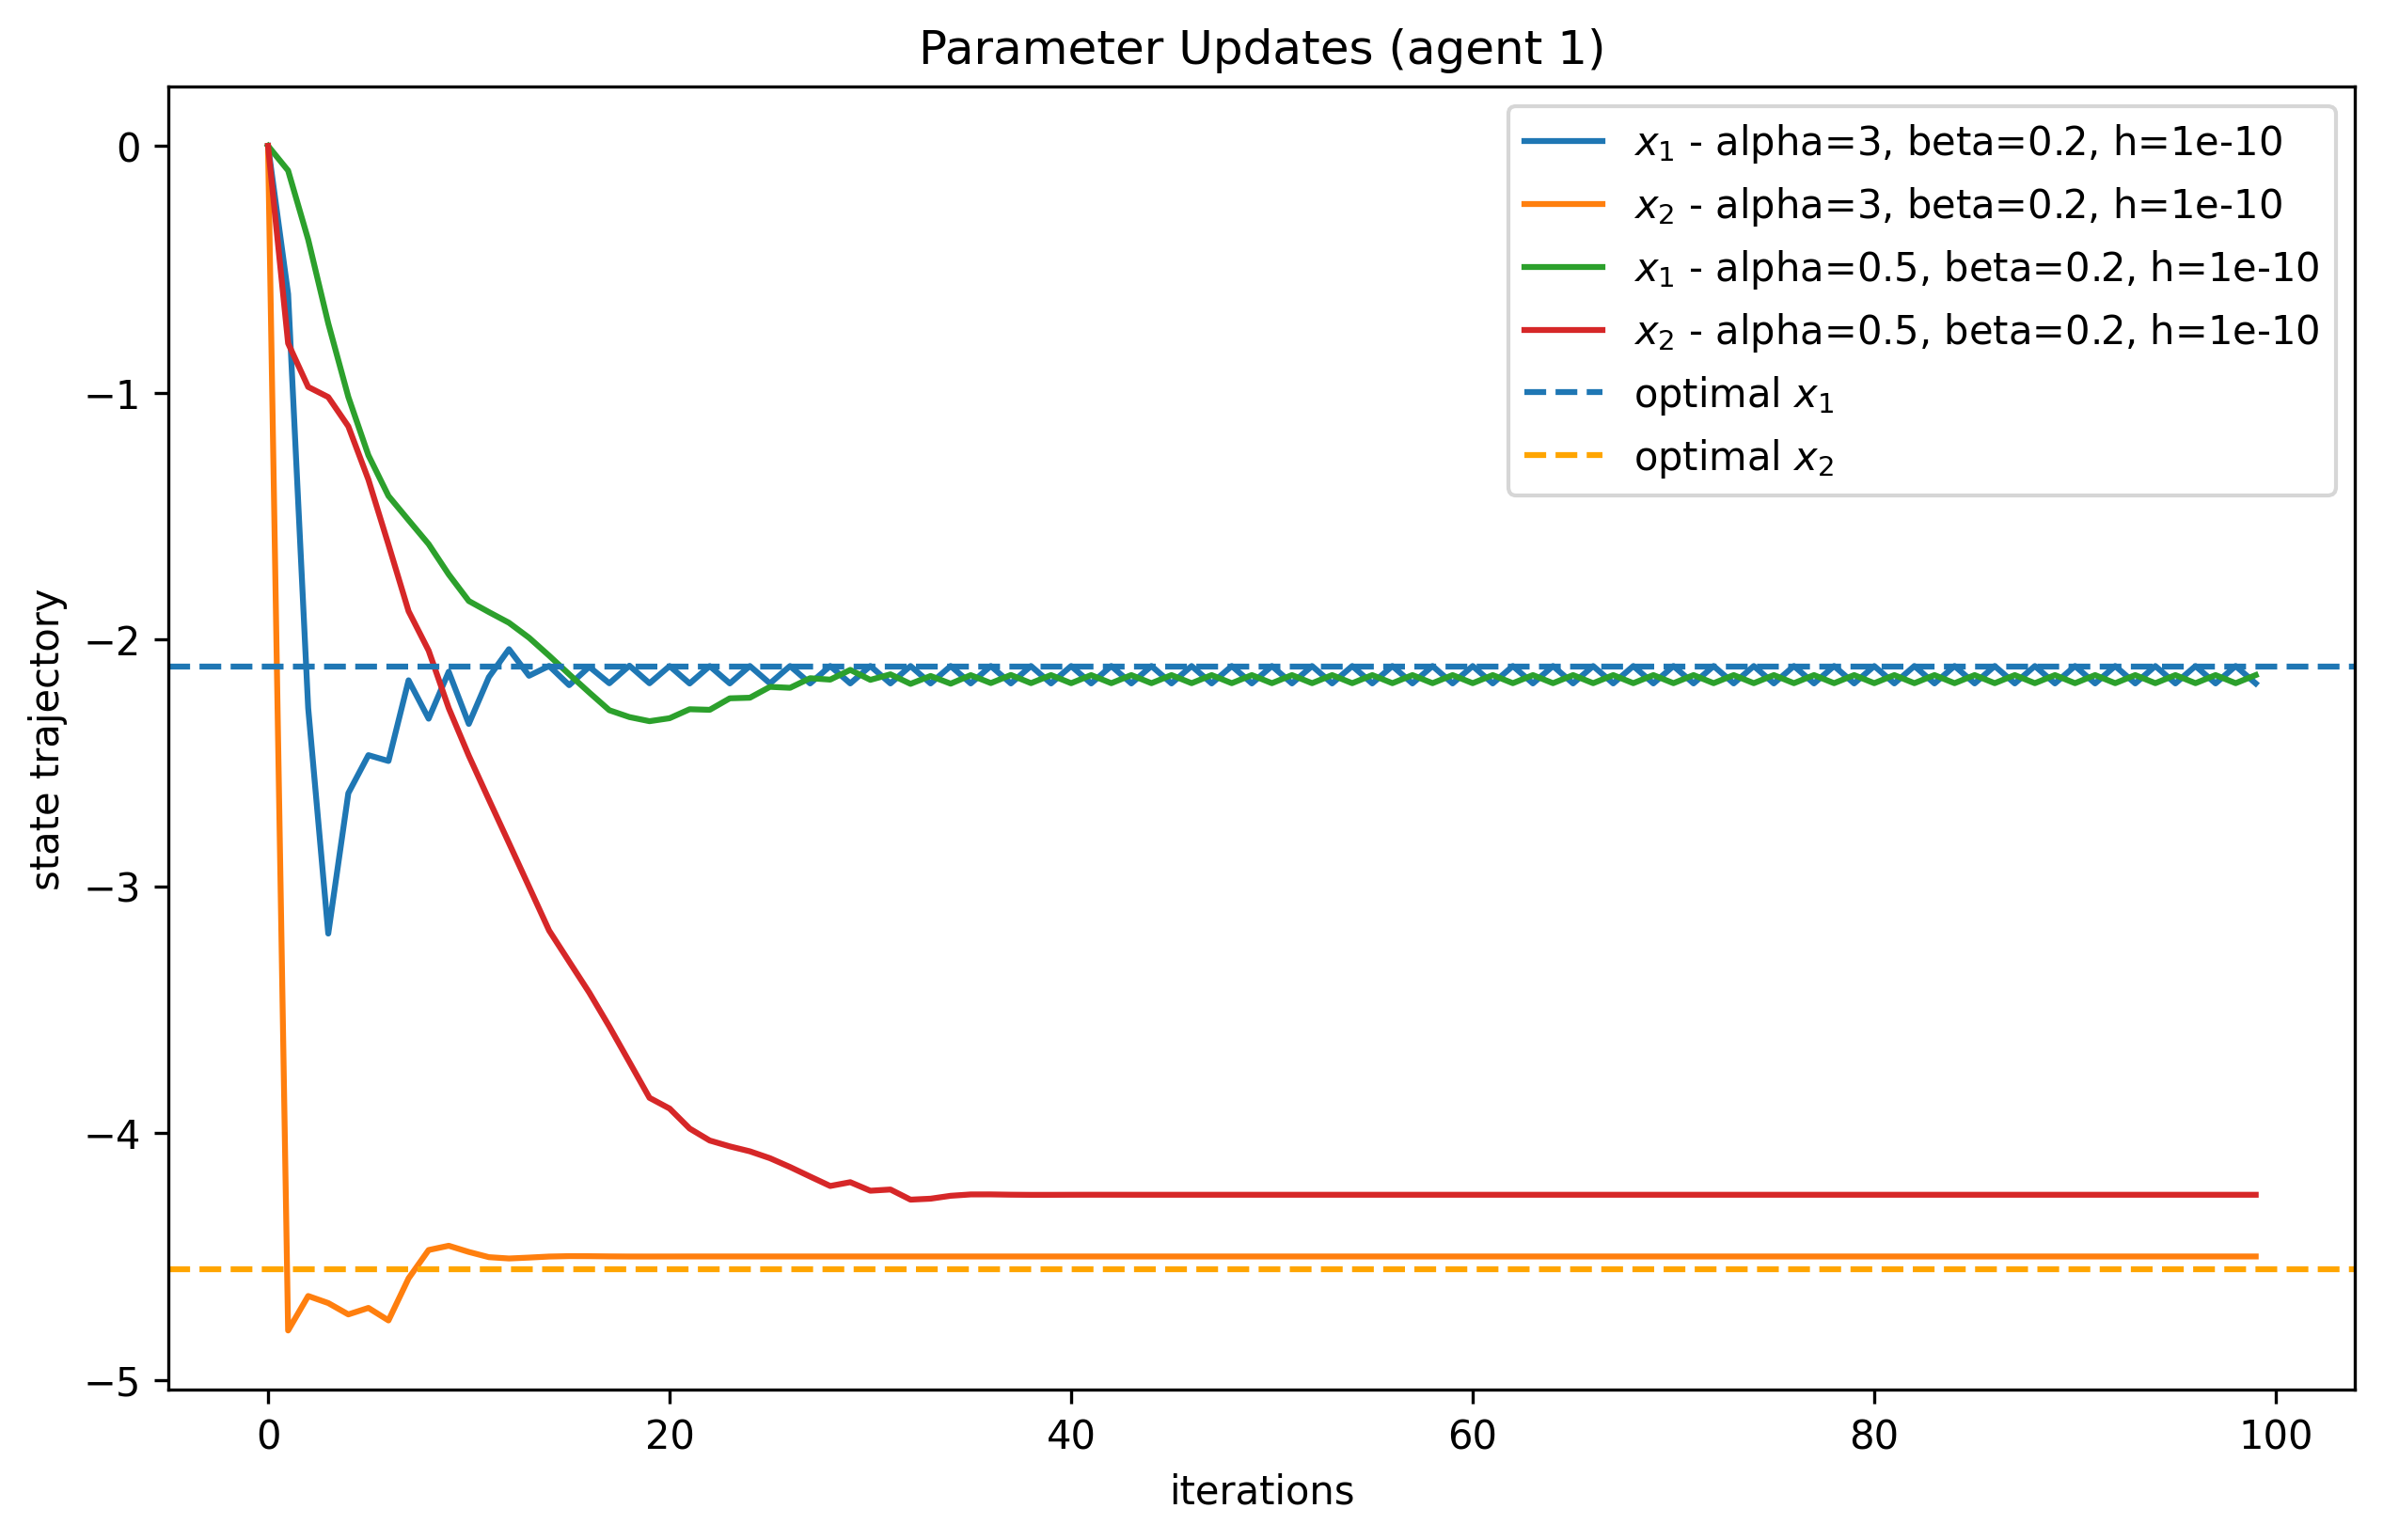

x in last iteration = [ [-2.14430831] [-4.25] ]


In [30]:
from utils import *

# alpha = 3 best (divergence from optimum of 0.07 and 0.05)
    # going alpha < 3 causes divergence of 0.07, 0.37

alphas = [3, 0.5]     # going alpha < 3 solves the shimmering, but diverges from optimum


betas = [0.2]
hs = [1e-10]      # h = 1e-2 optimal
plot_streamlined(alphas, betas, hs, n_iterations= 100, step_version= "step_v2")

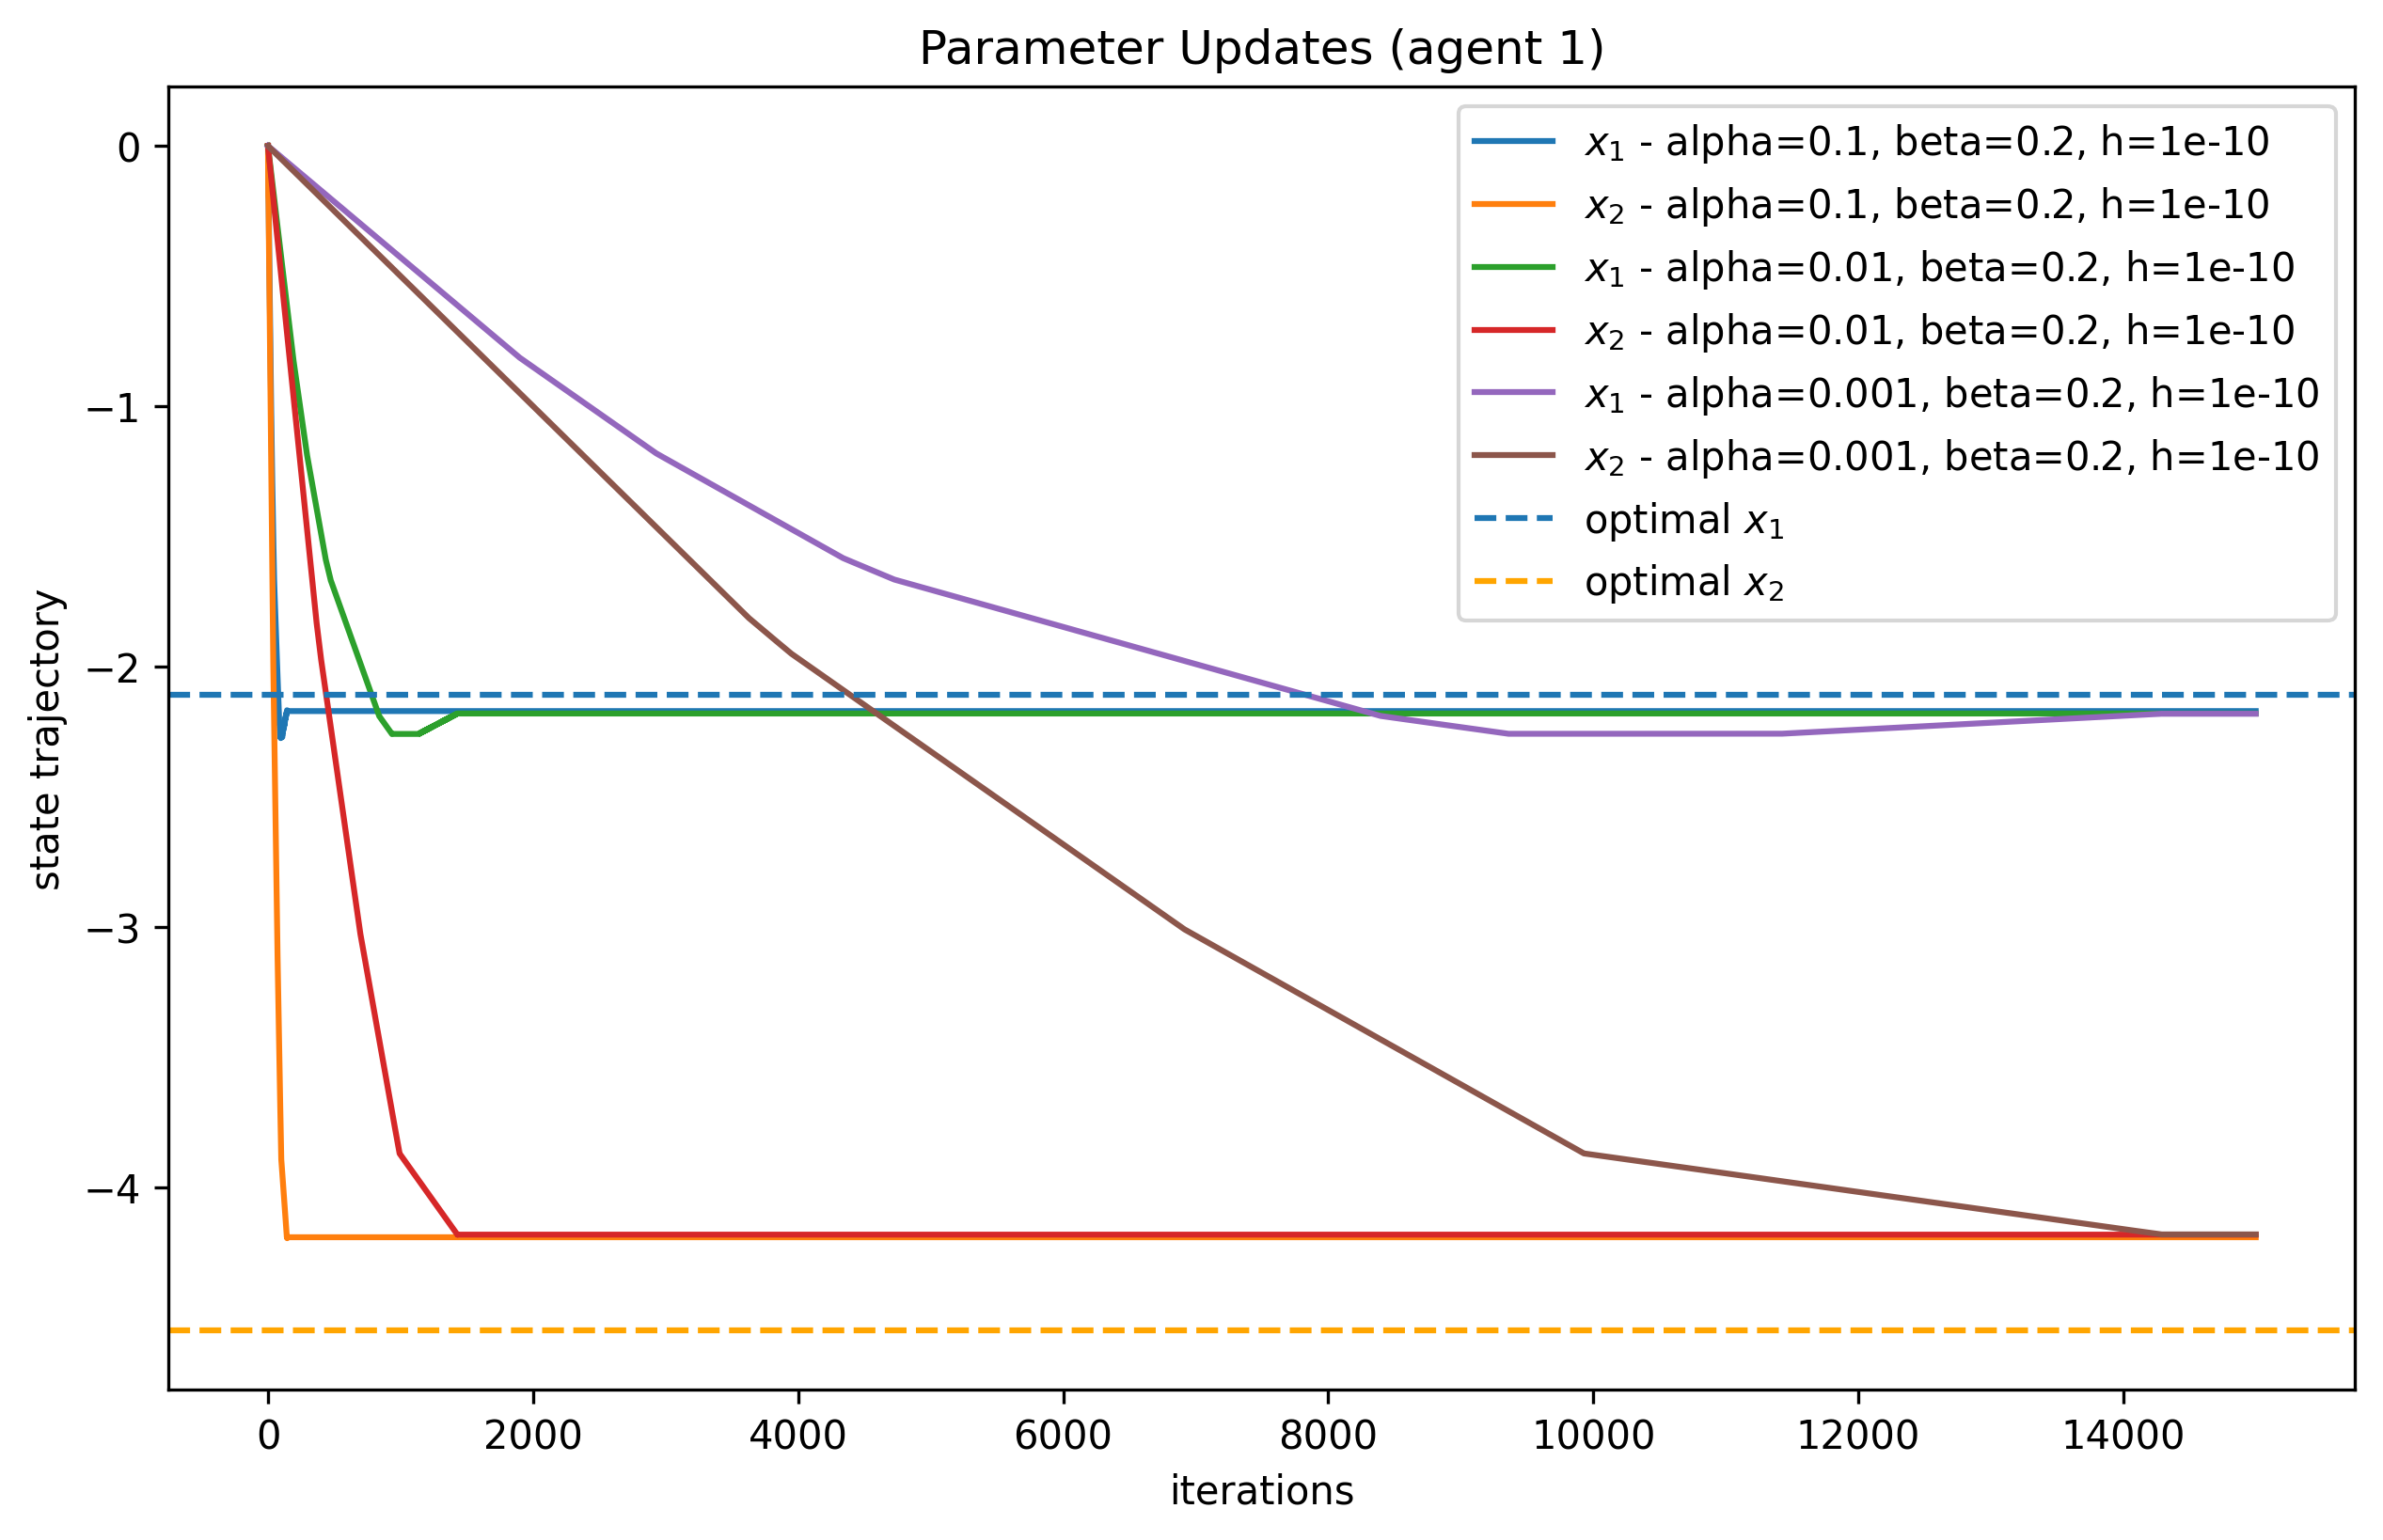

x in last iteration = [ [-2.18164286] [-4.182] ]


In [27]:
from utils import *

alphas = [0.1, 0.01, 0.001 ]     # going alpha < 3 solves the shimmering, but diverges from optimum

betas = [0.2]
hs = [1e-10]      # h = 1e-2 optimal
plot_streamlined(alphas, betas, hs, n_iterations=15000, step_version= "step_v2")

## Numerical differentiation vs autograd

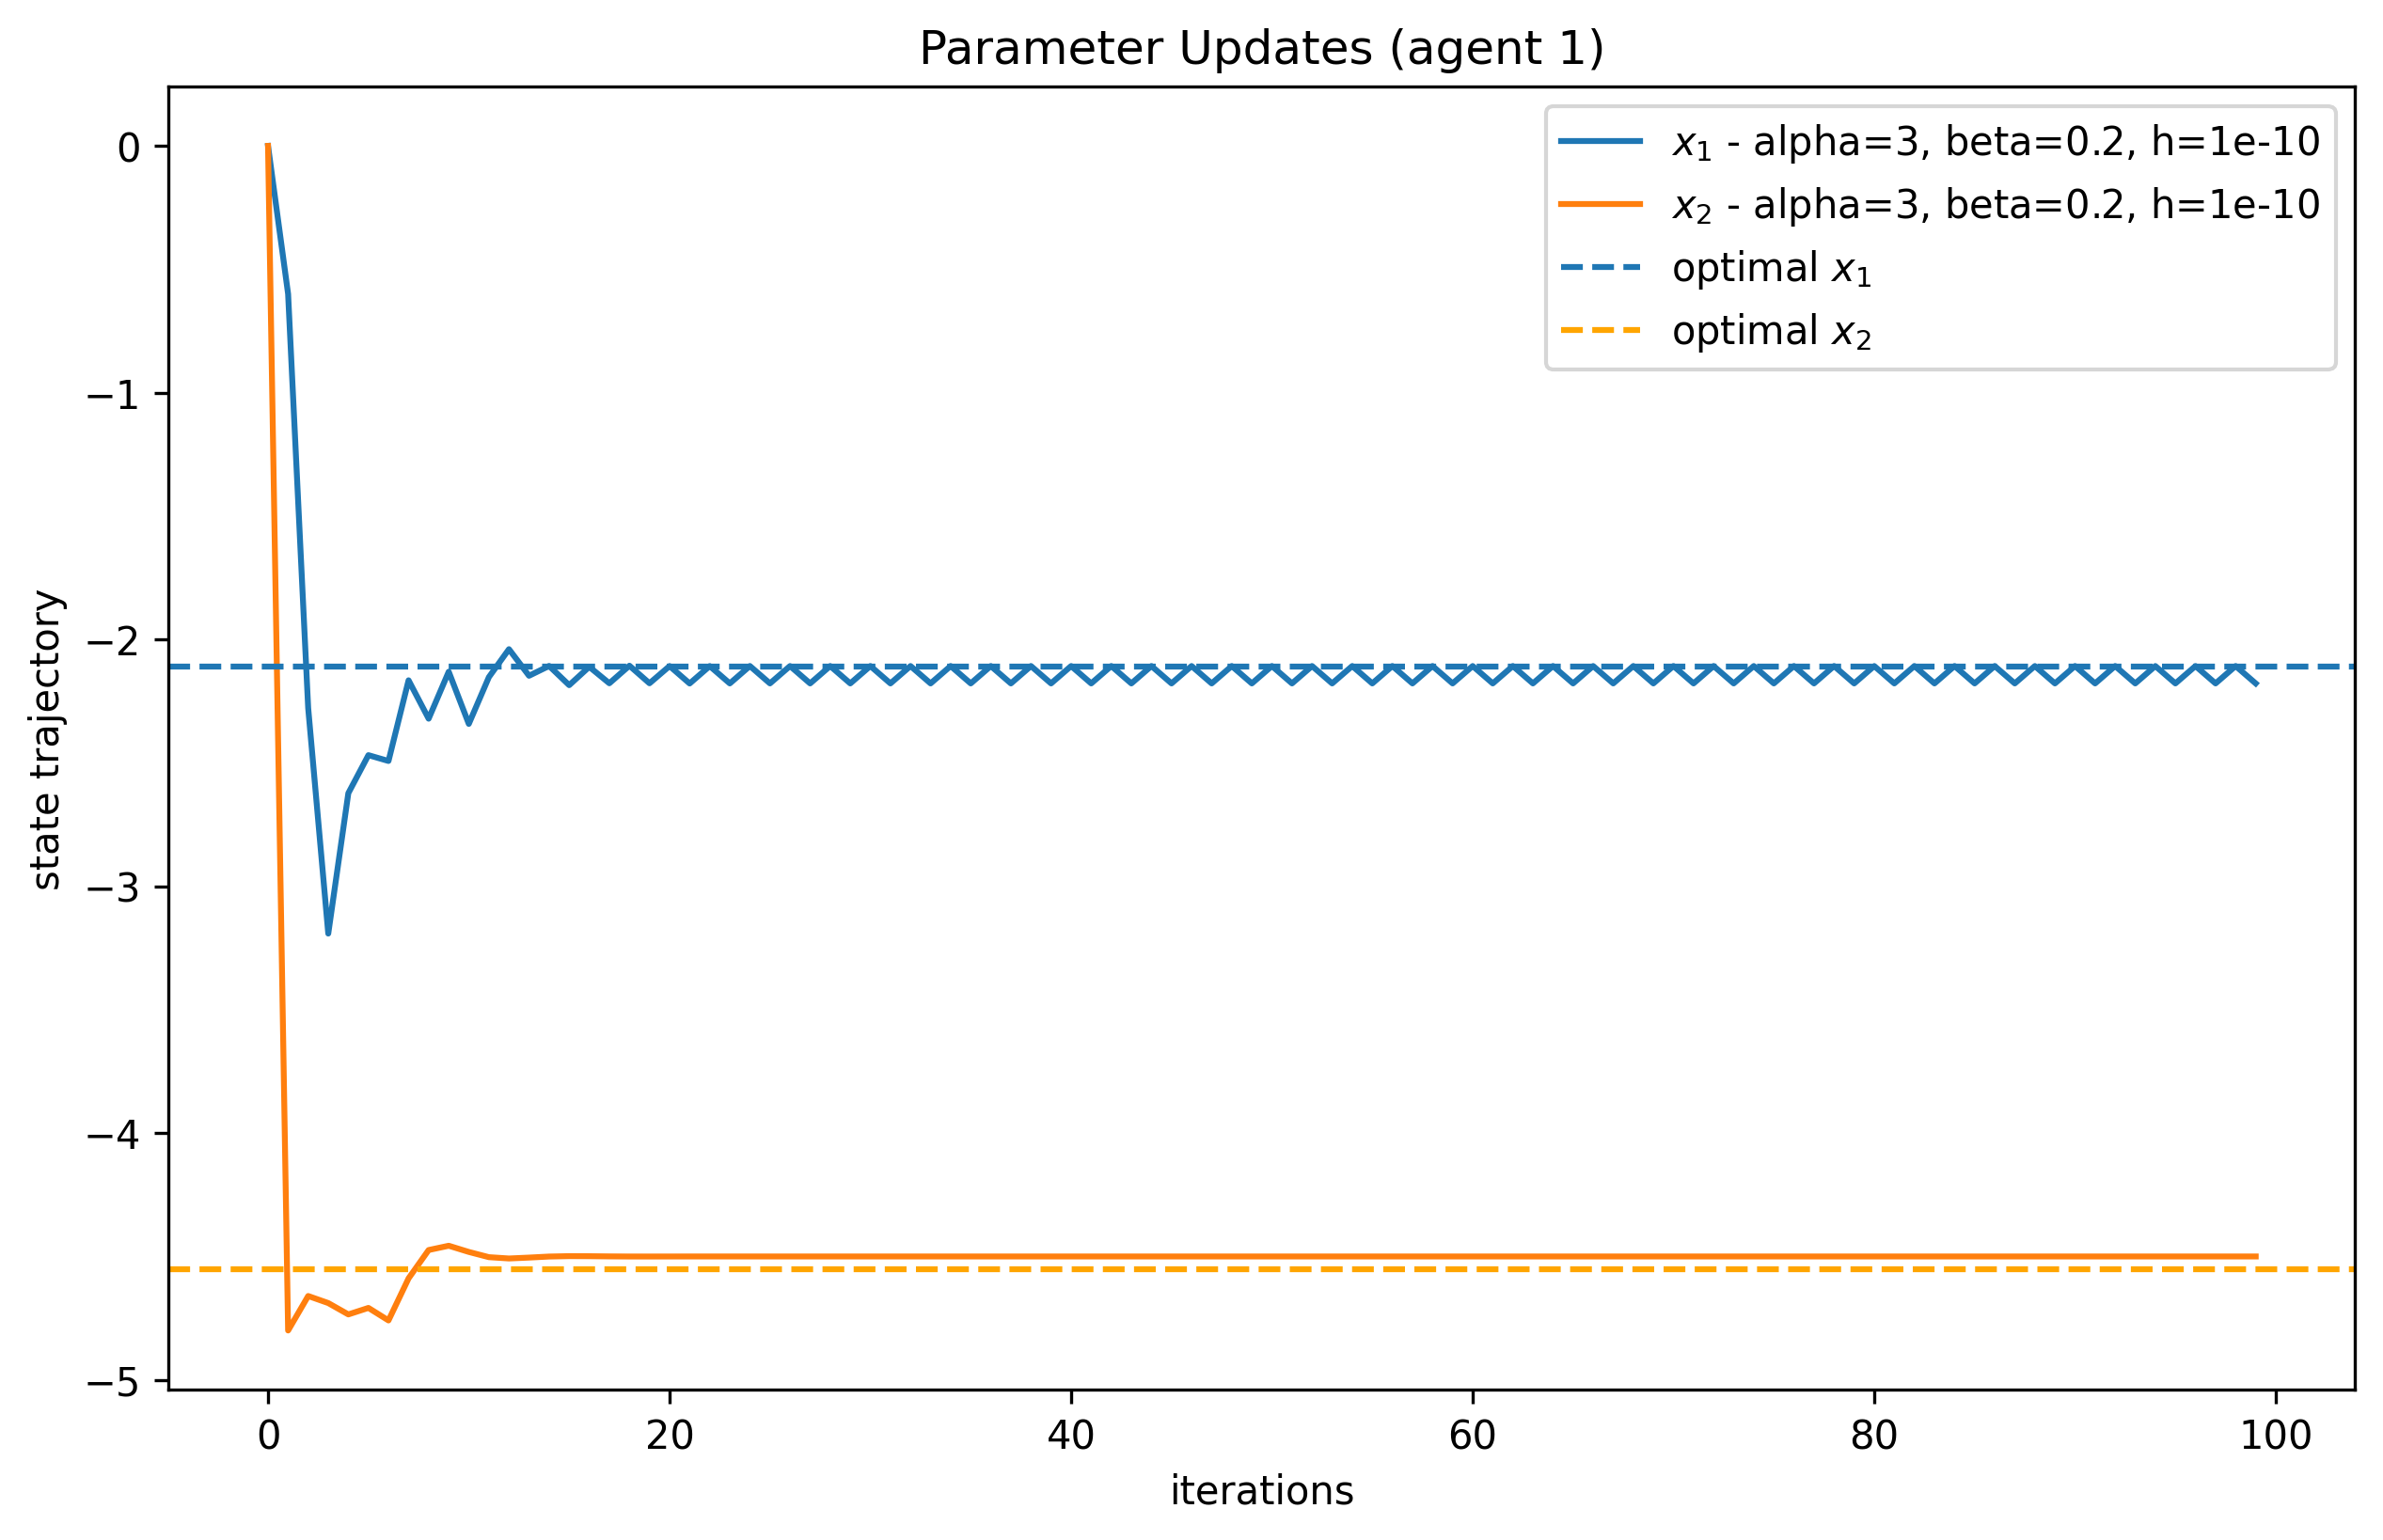

x in last iteration = [ [-2.17810606] [-4.5] ]


In [9]:
from utils import *

alphas = [3]     # going alpha < 3 solves the shimmering, but still doesn't converge to optimum

betas = [0.2]
hs = [1e-10]      # h = 1e-2 optimal
plot_streamlined(alphas, betas, hs, n_iterations=100, subgradient= "euler", step_version= "step_v2")

### Autograd - same as Euler with h=`1e-10`

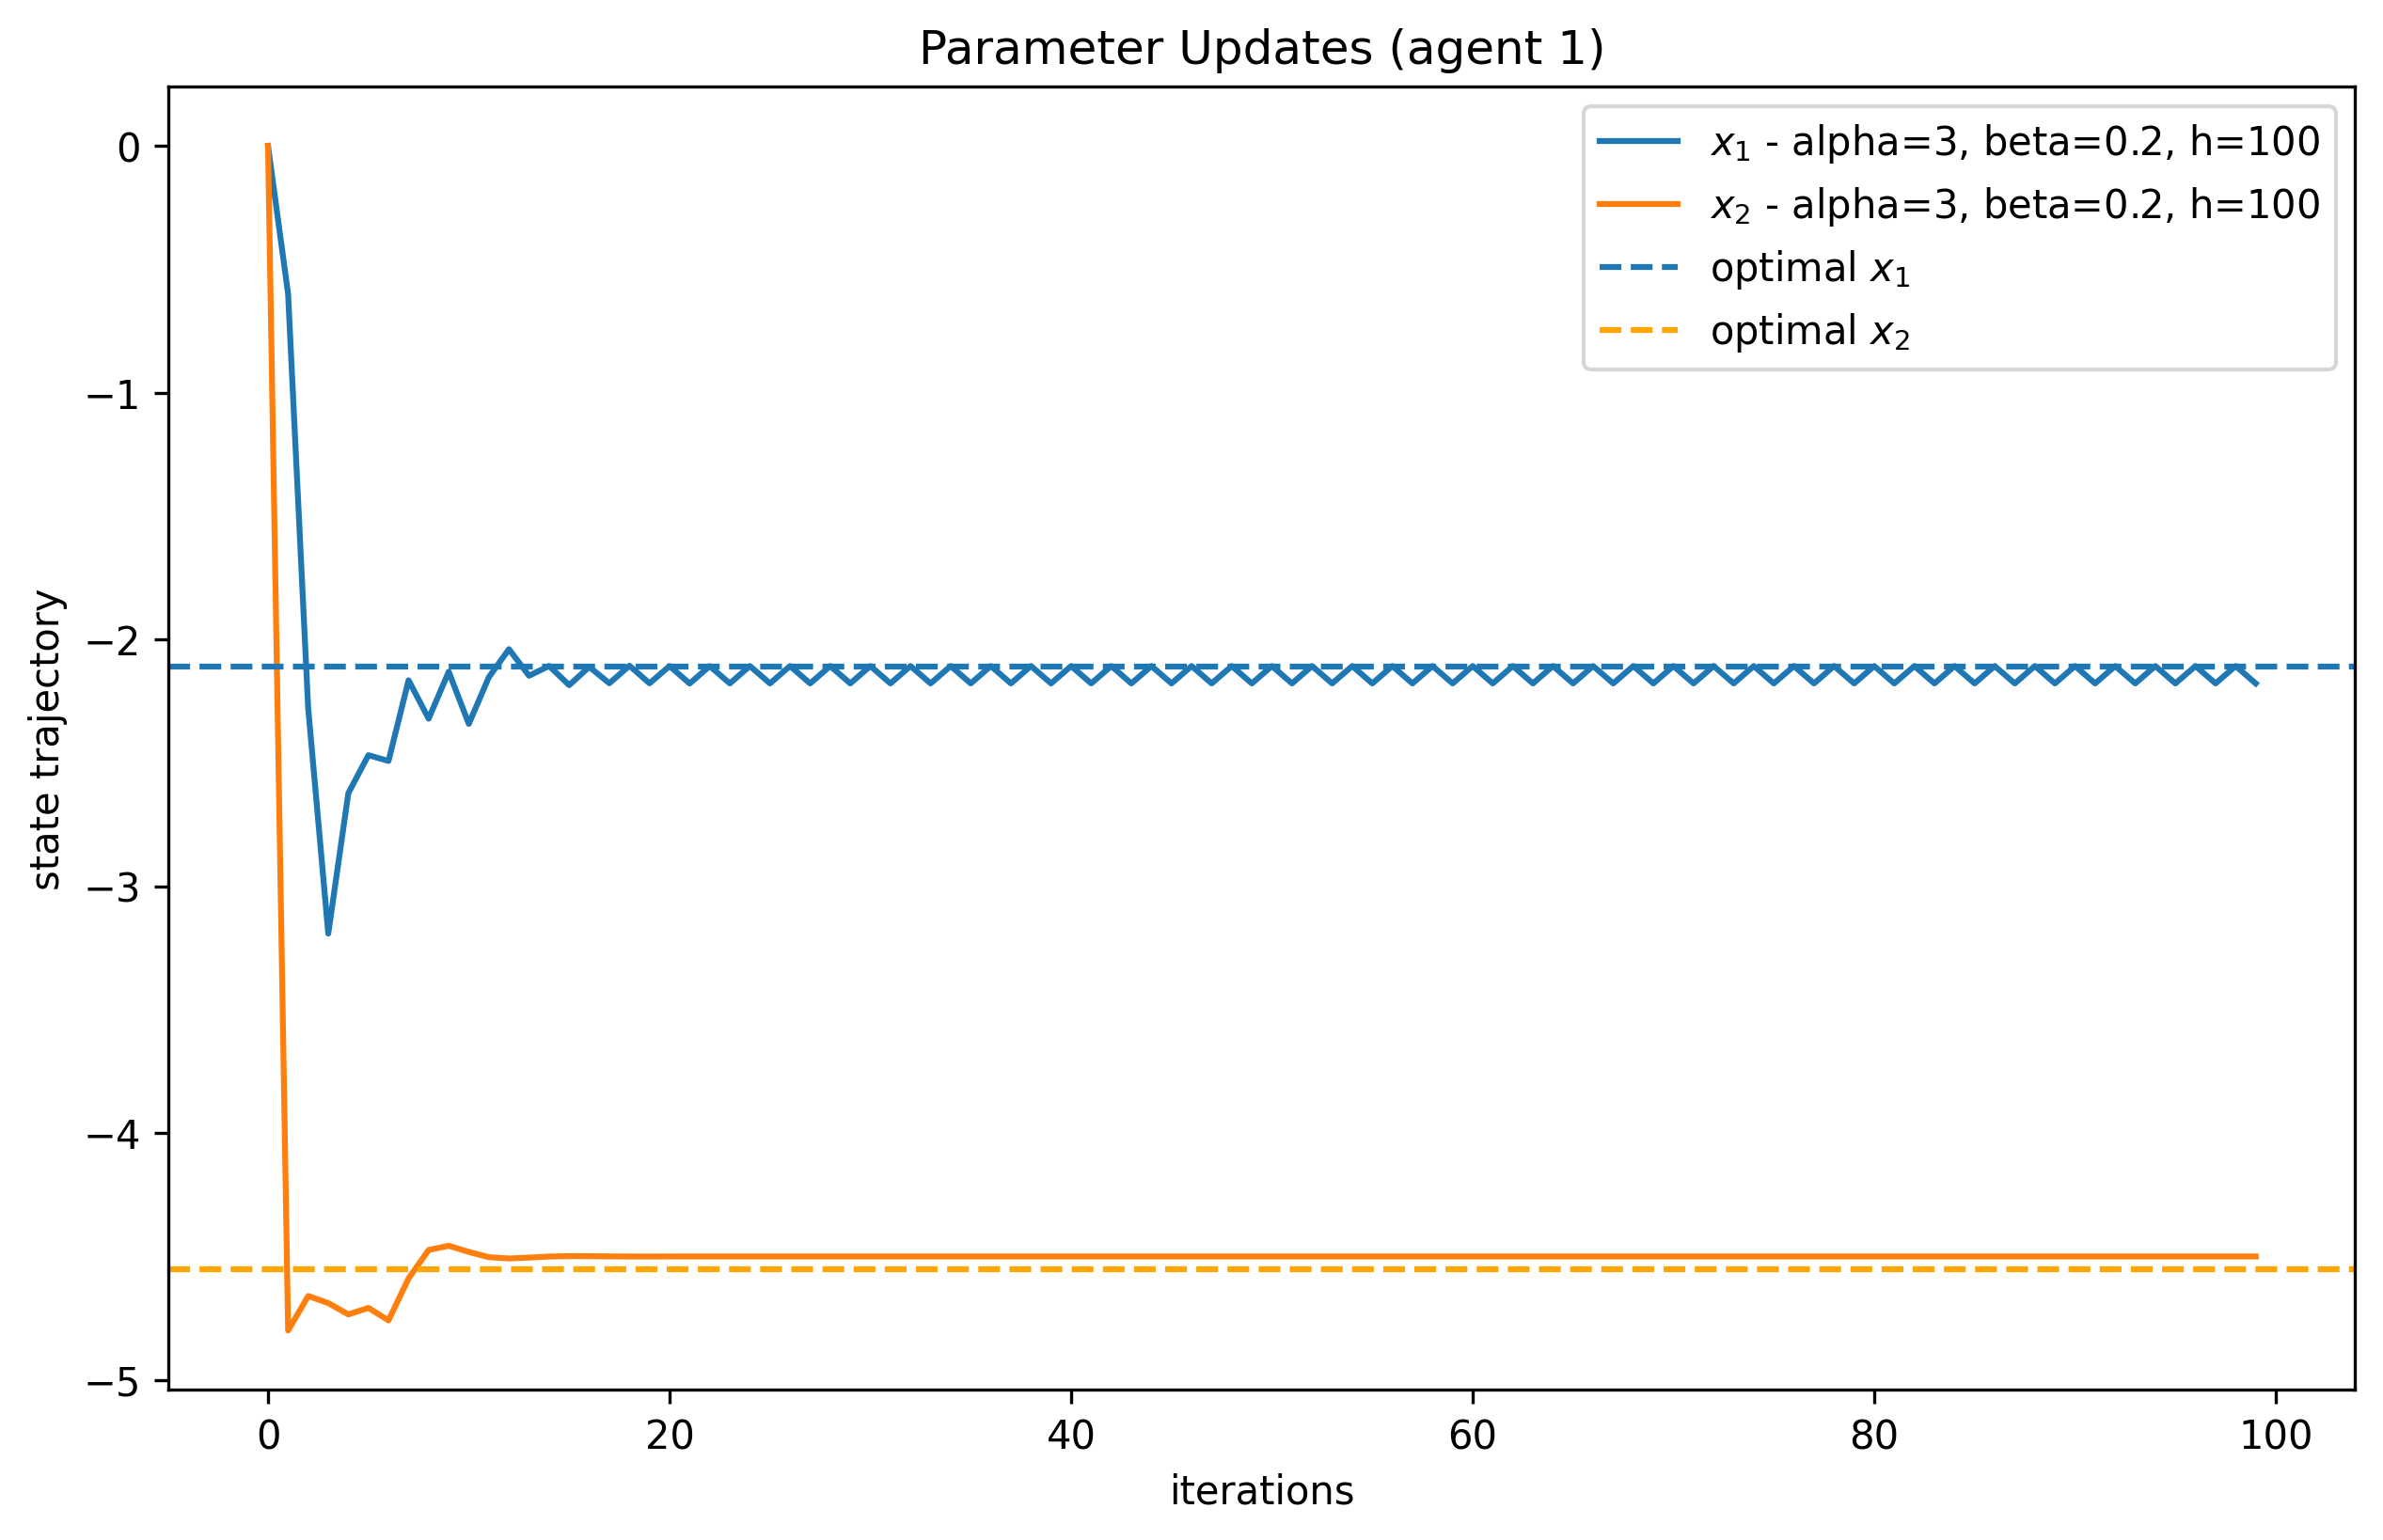

x in last iteration = [ [-2.17810606] [-4.5] ]


In [3]:
from v2_utils import *

alphas = [3]     # going alpha < 3 solves the shimmering, but still doesn't converge to optimum

betas = [0.2]
hs = [100]      # h = 1e-2 optimal
plot_streamlined(alphas, betas, hs, n_iterations=100, subgradient= "autograd", step_version= "step_v2")

# Inspecting centralized optimization for f_global -> WORKS: converges, no chatter

- f_global as objective function to minimize 
- only 1 agent
- optimization algortihm = gradient descent

In [4]:
import numpy as np

N_AGENTS = 4


P = np.array(
    [ [[0.2, 0.1],
        [0.1, 0.2]],

      [[0.4, 0.1],
        [0.2, 0.4]],

      [[0.3, 0.1],
        [0.1, 0.2]],

      [[0.5, 0.1],
        [0.1, 0.2]],   
          ]
)

b = np.array(
    [ [[1],
        [8]],

      [[1],
        [1]],

      [[3],
        [1]],

      [[5],
        [1]],   
        ]
)

c = np.linspace(start= 0, stop= 1, num= N_AGENTS)      # c_i are chosen uniformly from [0, 1]


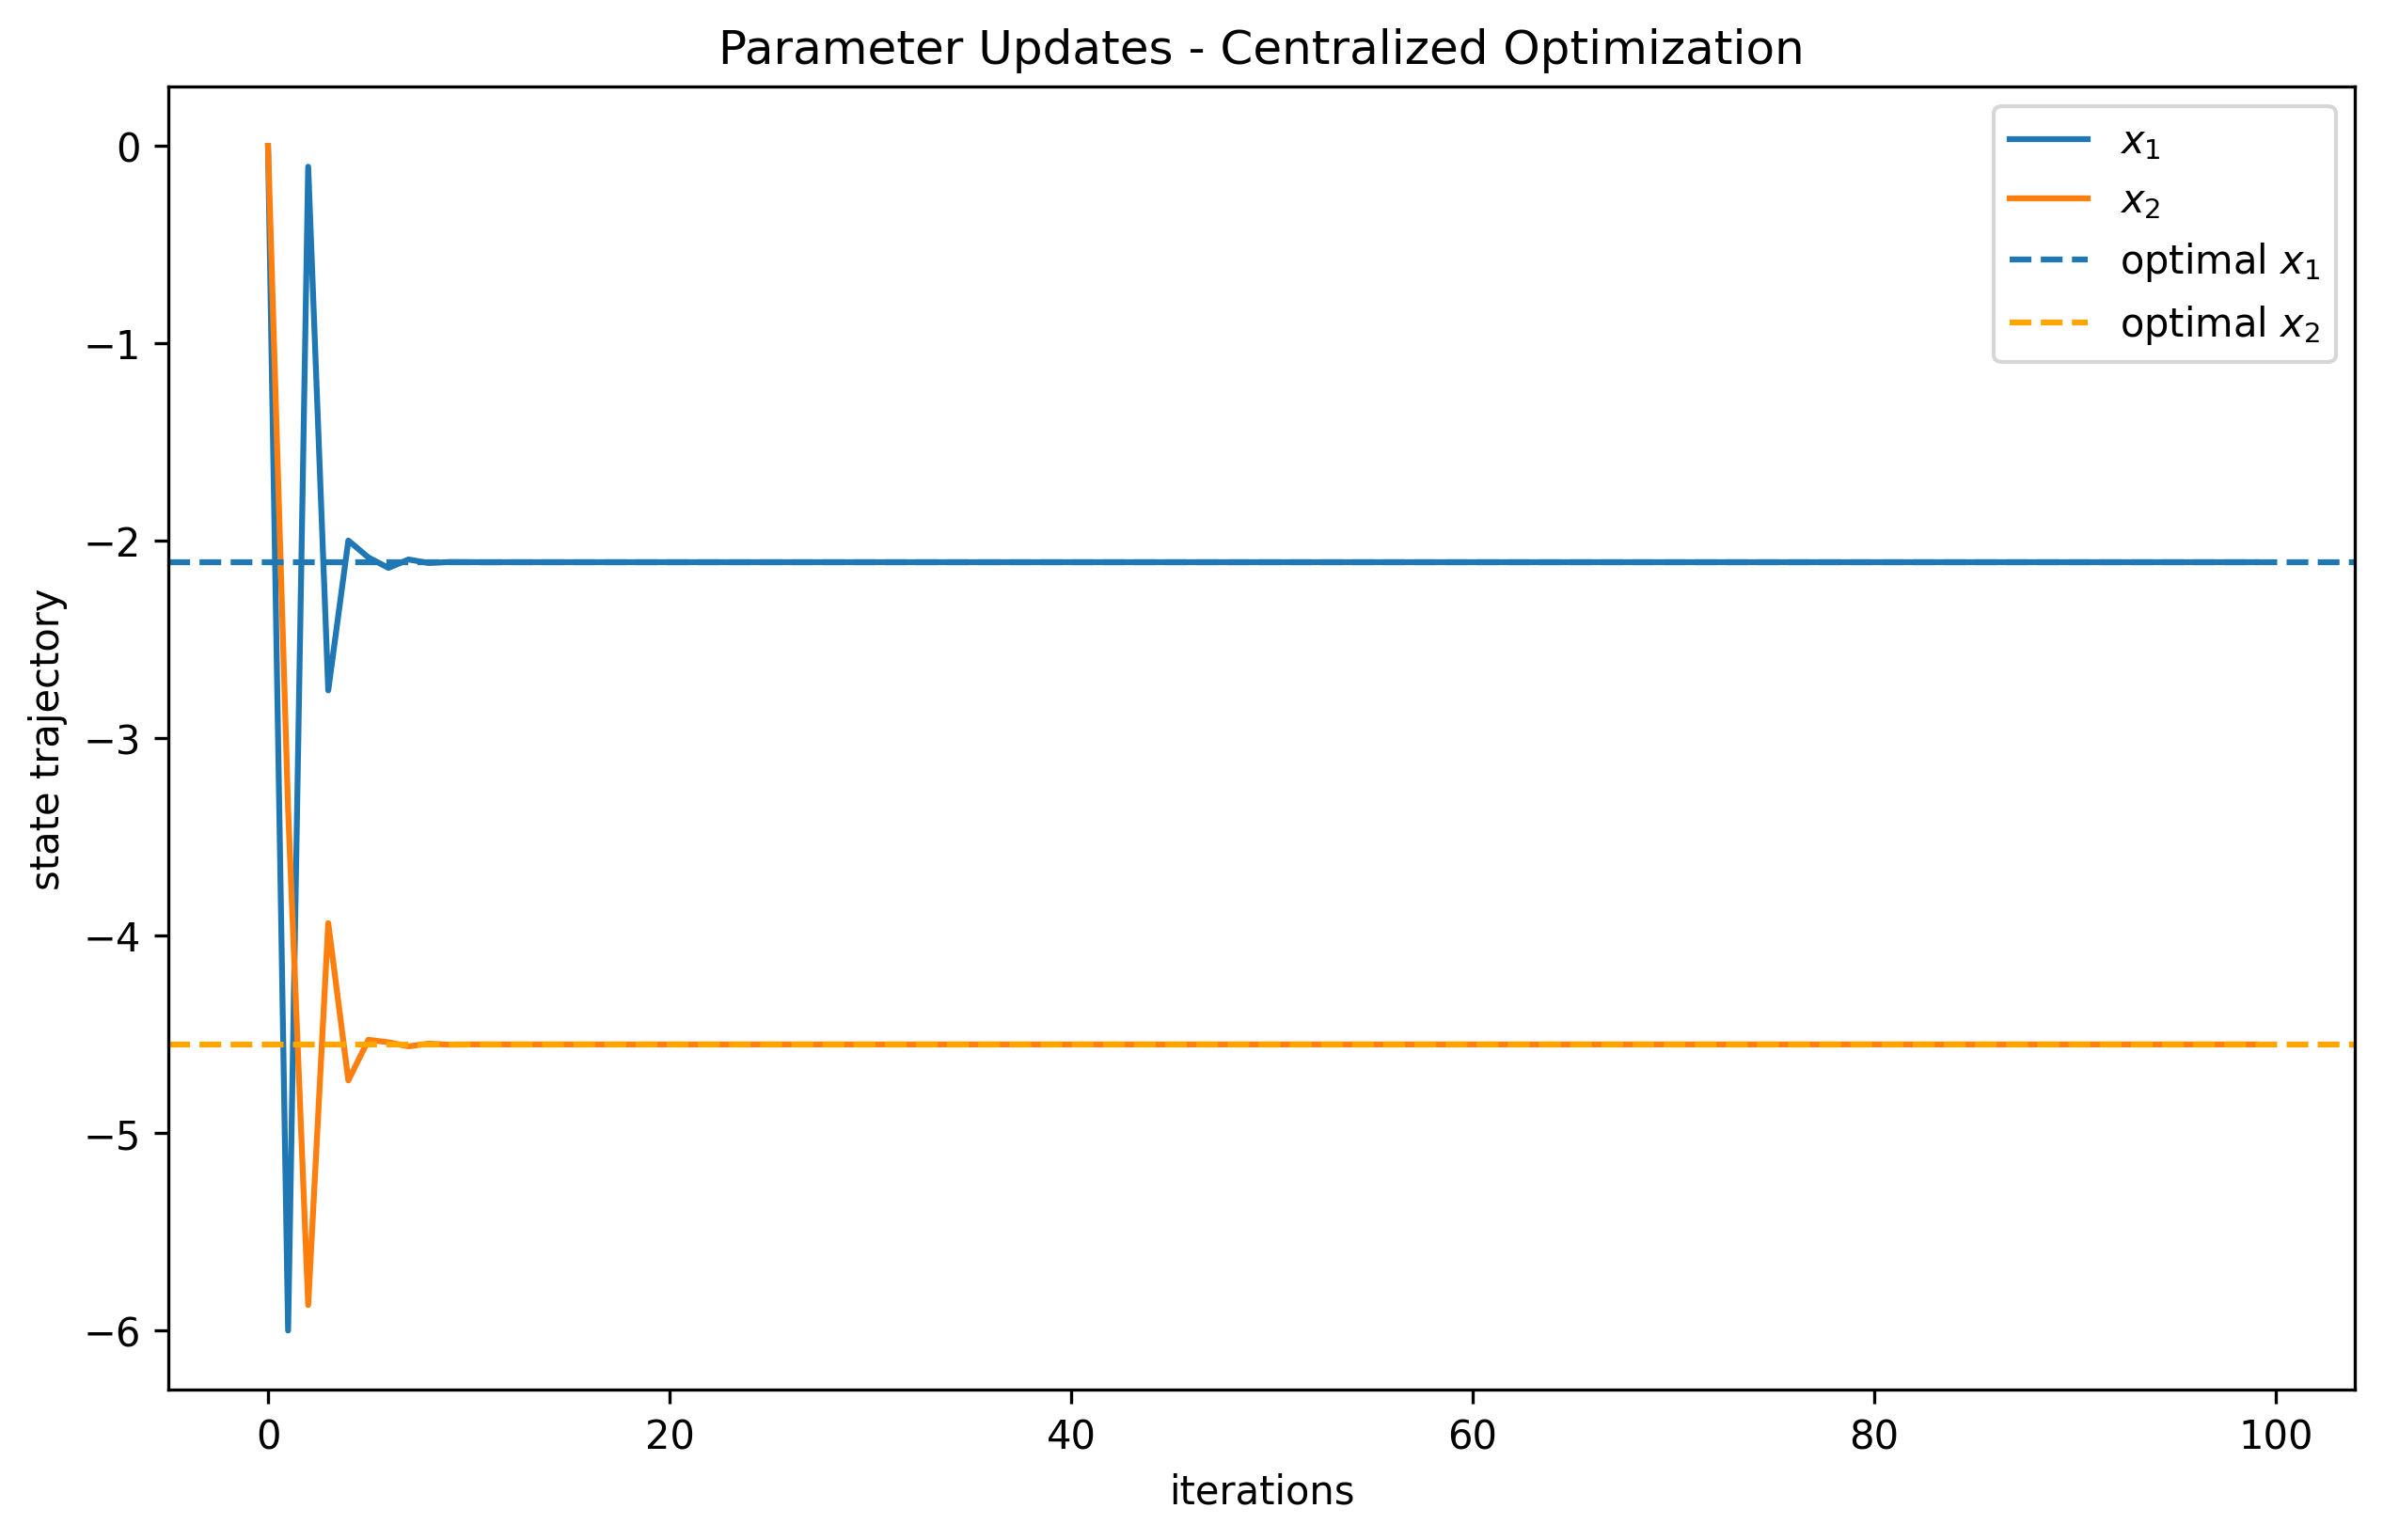

In [13]:
def gradient_vector_f_global_Autograd(x):

    import jax

    x1, x2 = x[0], x[1]

    f_partial_x1 = jax.grad(f_global, argnums= 0)
    f_partial_x2 = jax.grad(f_global, argnums= 1)

    return f_partial_x1(x1, x2), f_partial_x2(x1, x2)

def f_global(x1, x2): 
    
    return sum(P[:, 0, 0]) * x1**2 + sum(P[:, 1, 1]) * x2 ** 2 \
           + ( sum(P[:, 1, 0]) + sum(P[: , 0, 1]) ) * x1 * x2 \
           + sum(b[:, 0, 0]) * x1 + sum(b[:, 1, 0]) * x2 \
           + sum(c)


optimal_x_1 = -2.1085595
optimal_x_2 = -4.5511482

n_iterations = 100


beta = 0.2
alpha = 3

learning_rate =  beta * alpha

x1, x2 = 0., 0.

history_x1 = []
history_x2 = []
for _ in range(n_iterations):
    
    history_x1.append(x1)
    history_x2.append(x2)
    
    x1 = x1 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[0]
    x2 = x2 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[1]


fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

ax.plot(range(len(history_x1)), history_x1, label = "$x_1$")
ax.plot(range(len(history_x2)), history_x2, label = "$x_2$")

ax.axhline(y= -2.108559, linestyle='dashed', label= "optimal $x_1$")
ax.axhline(y= -4.551148, linestyle='dashed', label= "optimal $x_2$", color="orange")

ax.set_title("Parameter Updates - Centralized Optimization")
ax.set_xlabel("iterations")
ax.set_ylabel("state trajectory")

ax.legend()
plt.show()


### step_v3 inspection

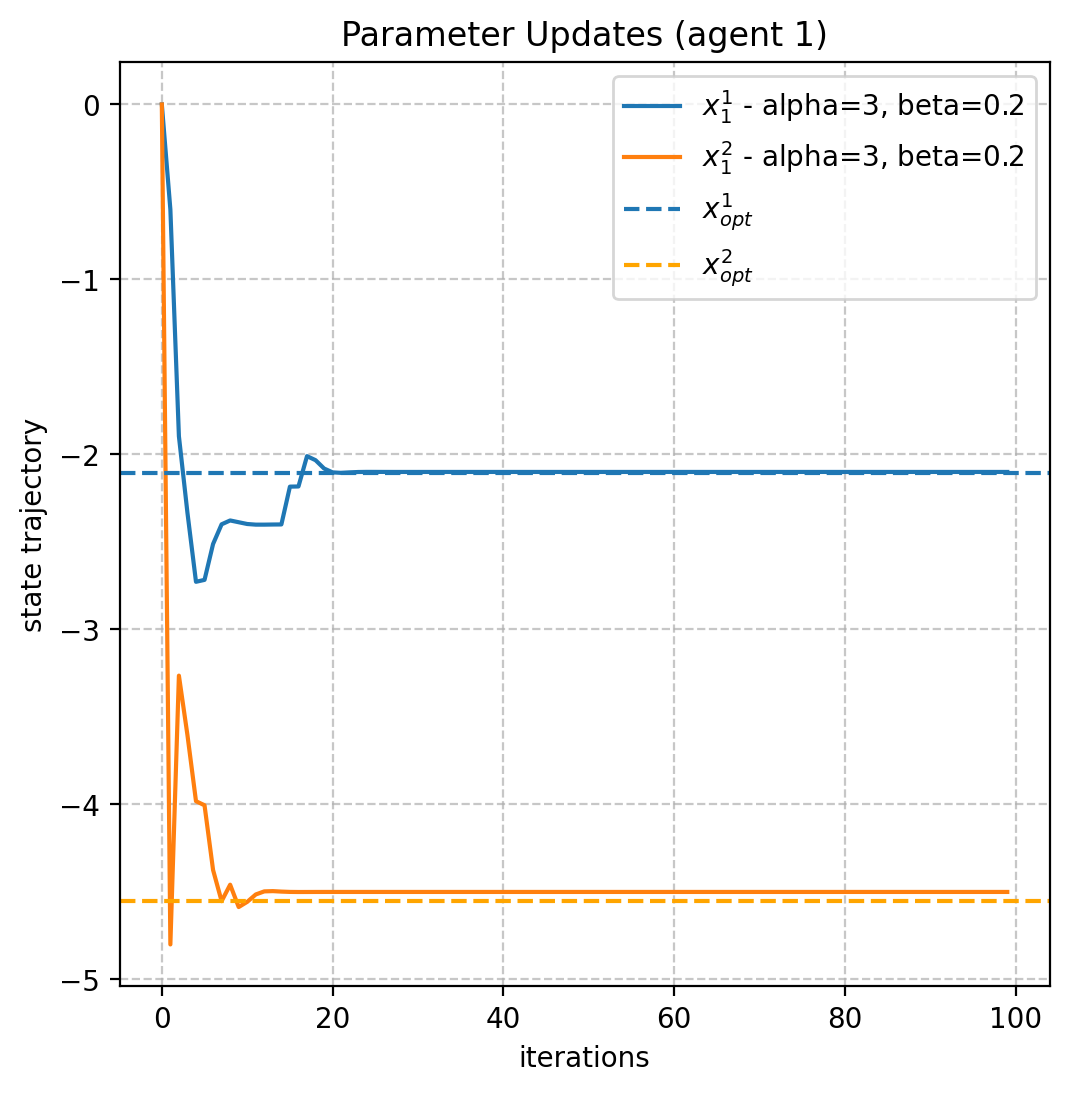

x in last iteration = [ [-2.1] [-4.5] ]


In [11]:
from v2_utils import *

alphas = [3]     # going alpha < 3 solves the shimmering, but still doesn't converge to optimum

betas = [0.2]     # going beta > 0.2 I get errors with autograd -> (extra) TODO: figure out why
hs = [1e-10]      # h = 1e-10 same effect as autograd
plot_streamlined(alphas, betas, hs, n_iterations=100, subgradient= "autograd", step_version= "step_v3")



### step_v2 inspection

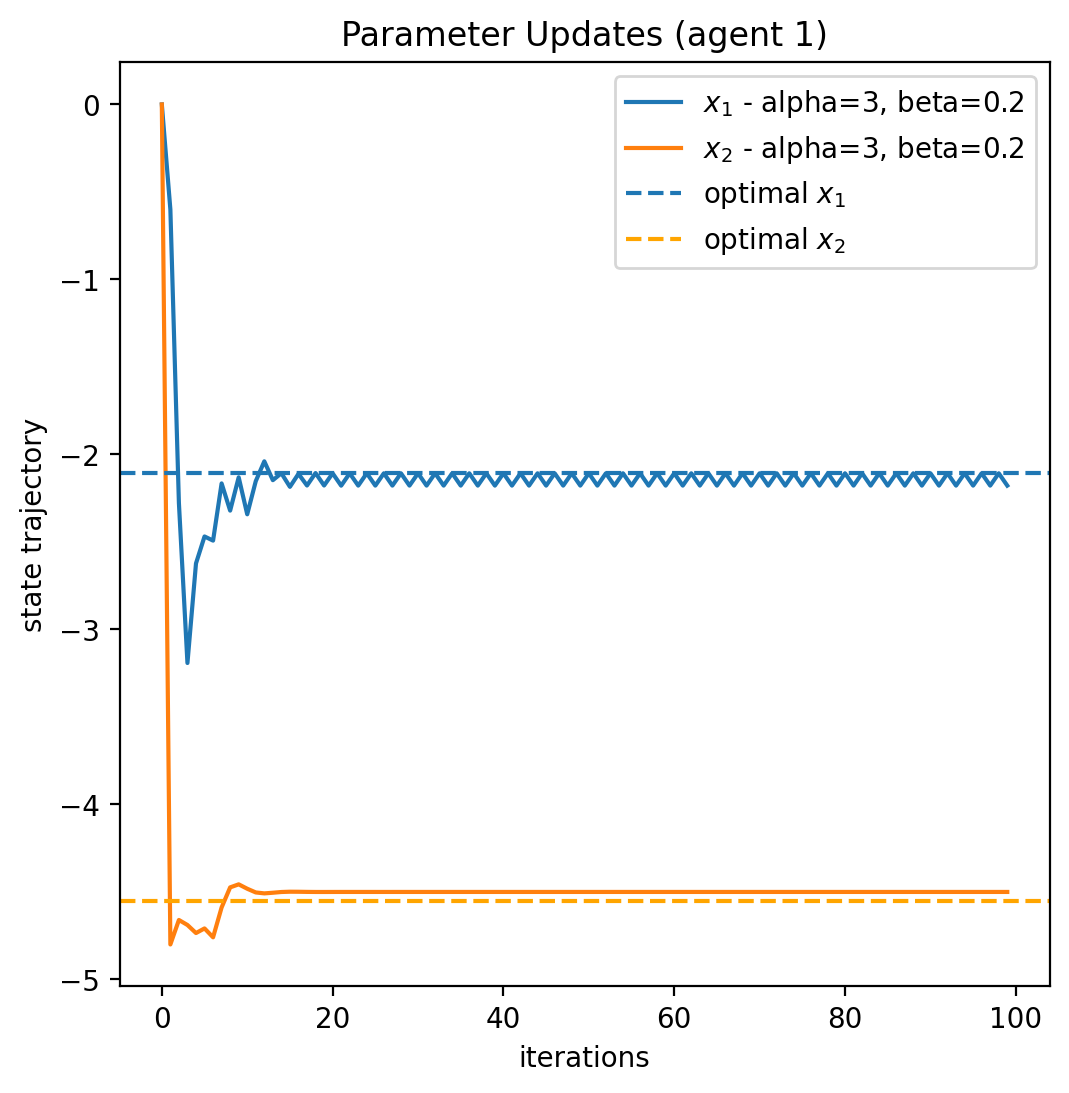

x in last iteration = [ [-2.17810606] [-4.5] ]


In [2]:
from v2_utils import *

alphas = [3]     # going alpha < 3 solves the shimmering, but still doesn't converge to optimum

betas = [0.2]
hs = [1e-10]      # h = 1e-10 same effect as autograd
plot_streamlined(alphas, betas, hs, n_iterations=100, subgradient= "autograd", step_version= "step_v2")



### Step v3 **gridseawrch**

KeyboardInterrupt: 

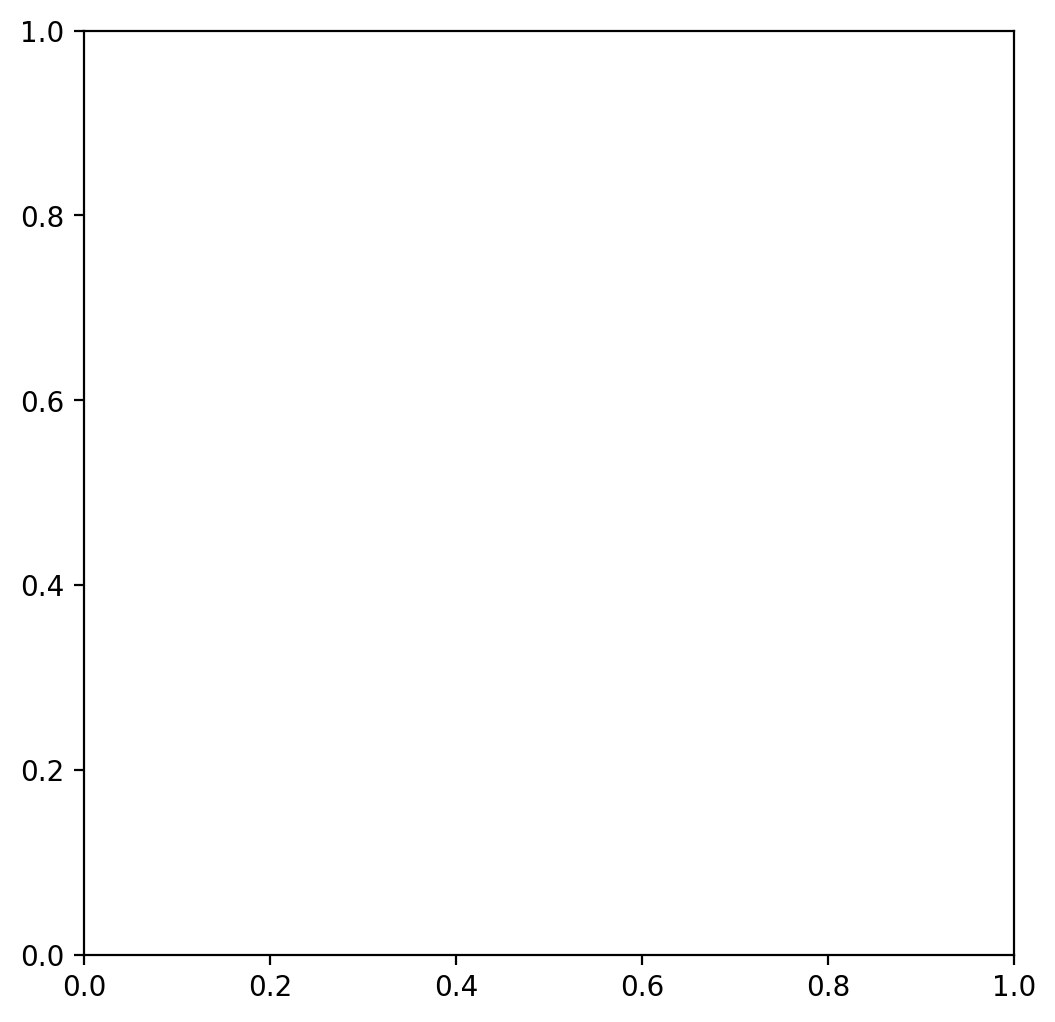

In [4]:
from v2_utils import *

alphas = [3]     # going alpha < 3 solves the shimmering, but still doesn't converge to optimum

betas = [0.05]
hs = [1e-10]      # h = 1e-10 same effect as autograd
plot_streamlined(alphas, betas, hs, n_iterations=500, subgradient= "autograd", step_version= "step_v3")



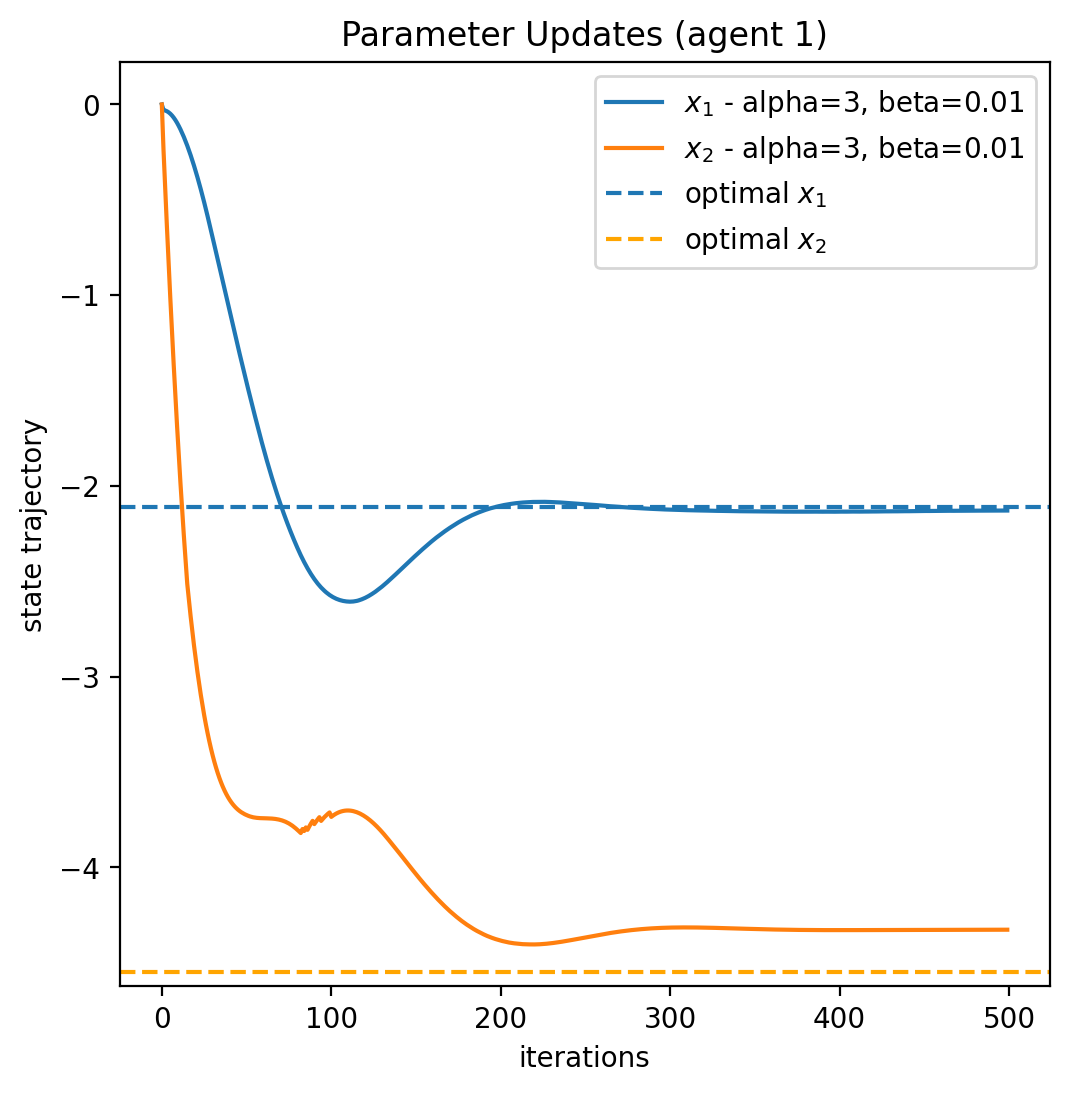

x in last iteration = [ [-2.12930457] [-4.32721141] ]


In [5]:
from v2_utils import *

alphas = [3]     # going alpha < 3 solves the shimmering, but still doesn't converge to optimum

betas = [0.01]
hs = [1e-10]      # h = 1e-10 same effect as autograd
plot_streamlined(alphas, betas, hs, n_iterations=500, subgradient= "autograd", step_version= "step_v3")



### Sam's parameters

ValueError: setting an array element with a sequence.

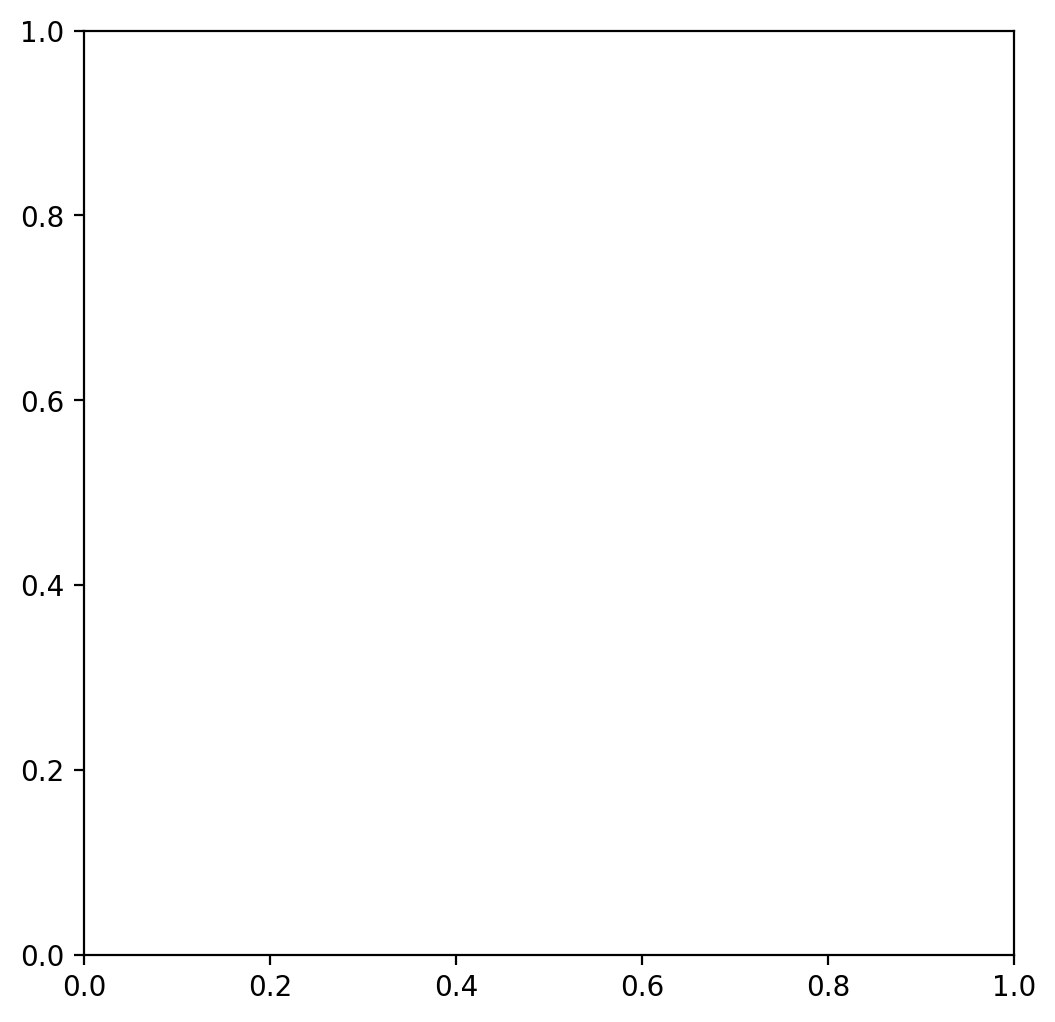

In [3]:
from v2_utils import *

alphas = [0.8]     # going alpha < 3 solves the shimmering, but still doesn't converge to optimum

betas = [0.8]
hs = [1e-10]      # h = 1e-10 same effect as autograd
plot_streamlined(alphas, betas, hs, n_iterations=500, subgradient= "autograd", step_version= "step_v3")

